<a href="https://colab.research.google.com/github/Sinha123456/Kaggle_projects/blob/master/bankchurners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BankChurn


This dataset consists of 10,000 customers mentioning their age, salary, marital_status, credit card limit, credit card category, etc. There are nearly 18 features.

We have only 16.07% of customers who have churned. Thus, it's a bit difficult to train our model to predict churning customers. I downloaded that dataset from the Kaggle site.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#import the necessary libraries
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

#read and display the data
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/kaggle_dataset/BankChurners.csv')
df.head(5)
# data=pd.DataFrame(data)
# print(data.head())

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
!git clone https://github.com/Sinha123456/projects_jupyter.git

Cloning into 'projects_jupyter'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 15 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (15/15), done.


In [5]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt


## Data Exploriing

In [6]:
#dropping unneccessary columns
df.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',axis = 1, inplace = True)

In [7]:
df.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', axis =1, inplace = True)

In [8]:
df.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [9]:
df.notna().sum()

CLIENTNUM                   10127
Attrition_Flag              10127
Customer_Age                10127
Gender                      10127
Dependent_count             10127
Education_Level             10127
Marital_Status              10127
Income_Category             10127
Card_Category               10127
Months_on_book              10127
Total_Relationship_Count    10127
Months_Inactive_12_mon      10127
Contacts_Count_12_mon       10127
Credit_Limit                10127
Total_Revolving_Bal         10127
Avg_Open_To_Buy             10127
Total_Amt_Chng_Q4_Q1        10127
Total_Trans_Amt             10127
Total_Trans_Ct              10127
Total_Ct_Chng_Q4_Q1         10127
Avg_Utilization_Ratio       10127
dtype: int64

In [10]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [13]:
df.duplicated().sum()

0

In [17]:
df.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

In [14]:
df.shape

(10127, 21)

## Data cleaning

In [19]:
#removing $ and k sign from the income category, so column would be readable.
def change_value(value):
    change = value.replace('K', '')
    if '$' in change:
        change = (change.replace('$', ''))
    if 'Less than' in change:
        change = (change.replace('Less than','30-'))
    if 'Unknown' in change:
        change = (change.replace('Unknown', '0'))
    return change
df['Income_Category'] = df['Income_Category'].apply(lambda x: change_value(x))

In [18]:
pd.value_counts(df['Attrition_Flag'])

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

## Data Visualization

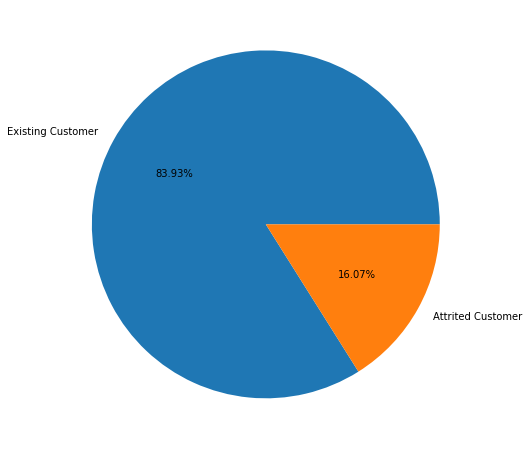

In [20]:
churn = pd.value_counts(df['Attrition_Flag']).tolist()
labels = ['Existing Customer', 'Attrited Customer']
plt.figure(figsize=(17,8))
plt.pie(x = churn, labels = labels, autopct = '%.2f%%')
plt.show()

In [22]:
df['Education_Level'].nunique

<bound method IndexOpsMixin.nunique of 0        High School
1           Graduate
2           Graduate
3        High School
4         Uneducated
            ...     
10122       Graduate
10123        Unknown
10124    High School
10125       Graduate
10126       Graduate
Name: Education_Level, Length: 10127, dtype: object>

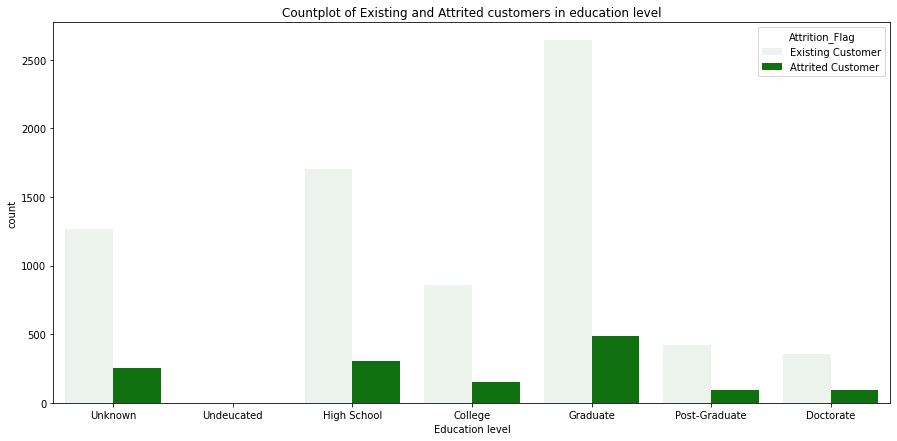

In [24]:
import seaborn as sns
plt.figure(figsize=(15,7))
sns.countplot(x = df['Education_Level'], hue = 'Attrition_Flag', order = ['Unknown', 'Undeucated', 'High School', 'College', 'Graduate', 'Post-Graduate','Doctorate'],
              data = df, color = 'g')
plt.title('Countplot of Existing and Attrited customers in education level')
plt.xlabel('Education level')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


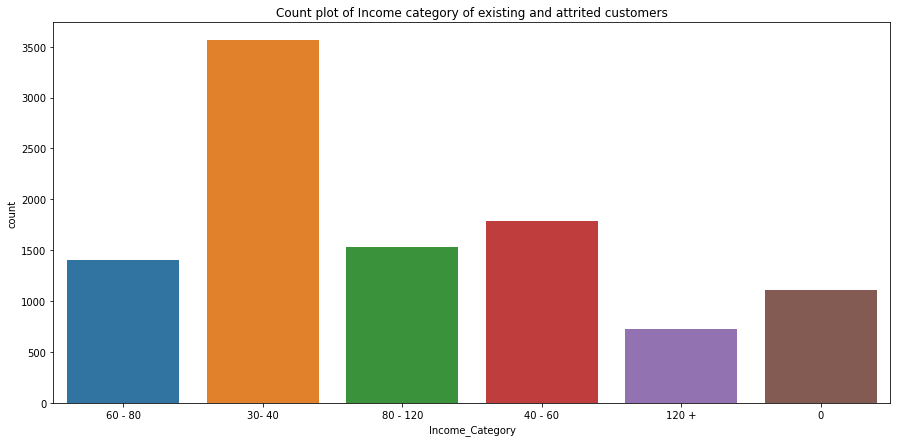

In [26]:
plt.figure(figsize=(15,7))
sns.countplot( 'Income_Category', data = df)
plt.title('Count plot of Income category of existing and attrited customers')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


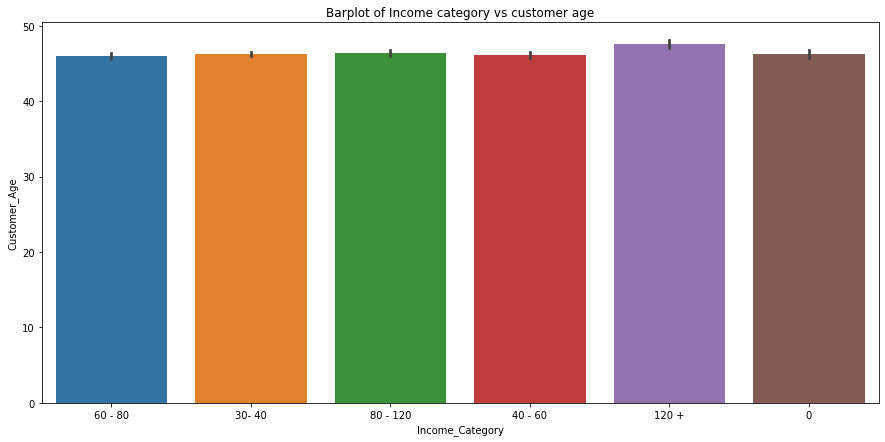

In [27]:
plt.figure(figsize=(15,7))
sns.barplot(df['Income_Category'], df['Customer_Age'])
plt.title('Barplot of Income category vs customer age')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


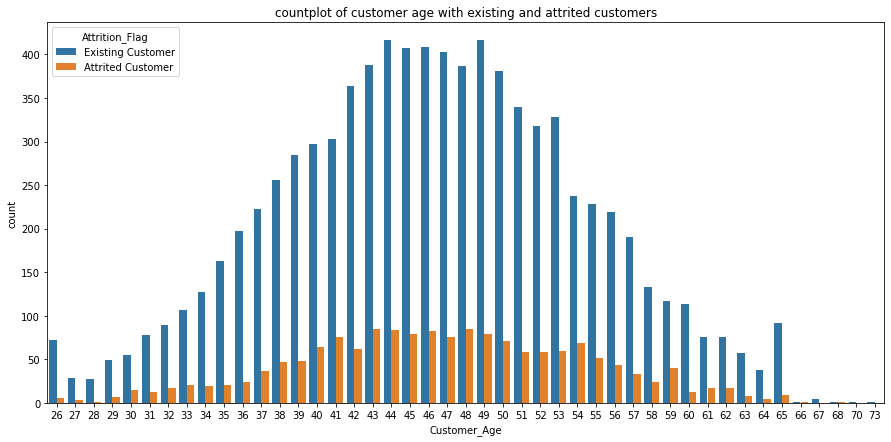

In [28]:
plt.figure(figsize=(15,7))
sns.countplot(df['Customer_Age'], hue = df['Attrition_Flag'])
plt.title('countplot of customer age with existing and attrited customers')
plt.show()

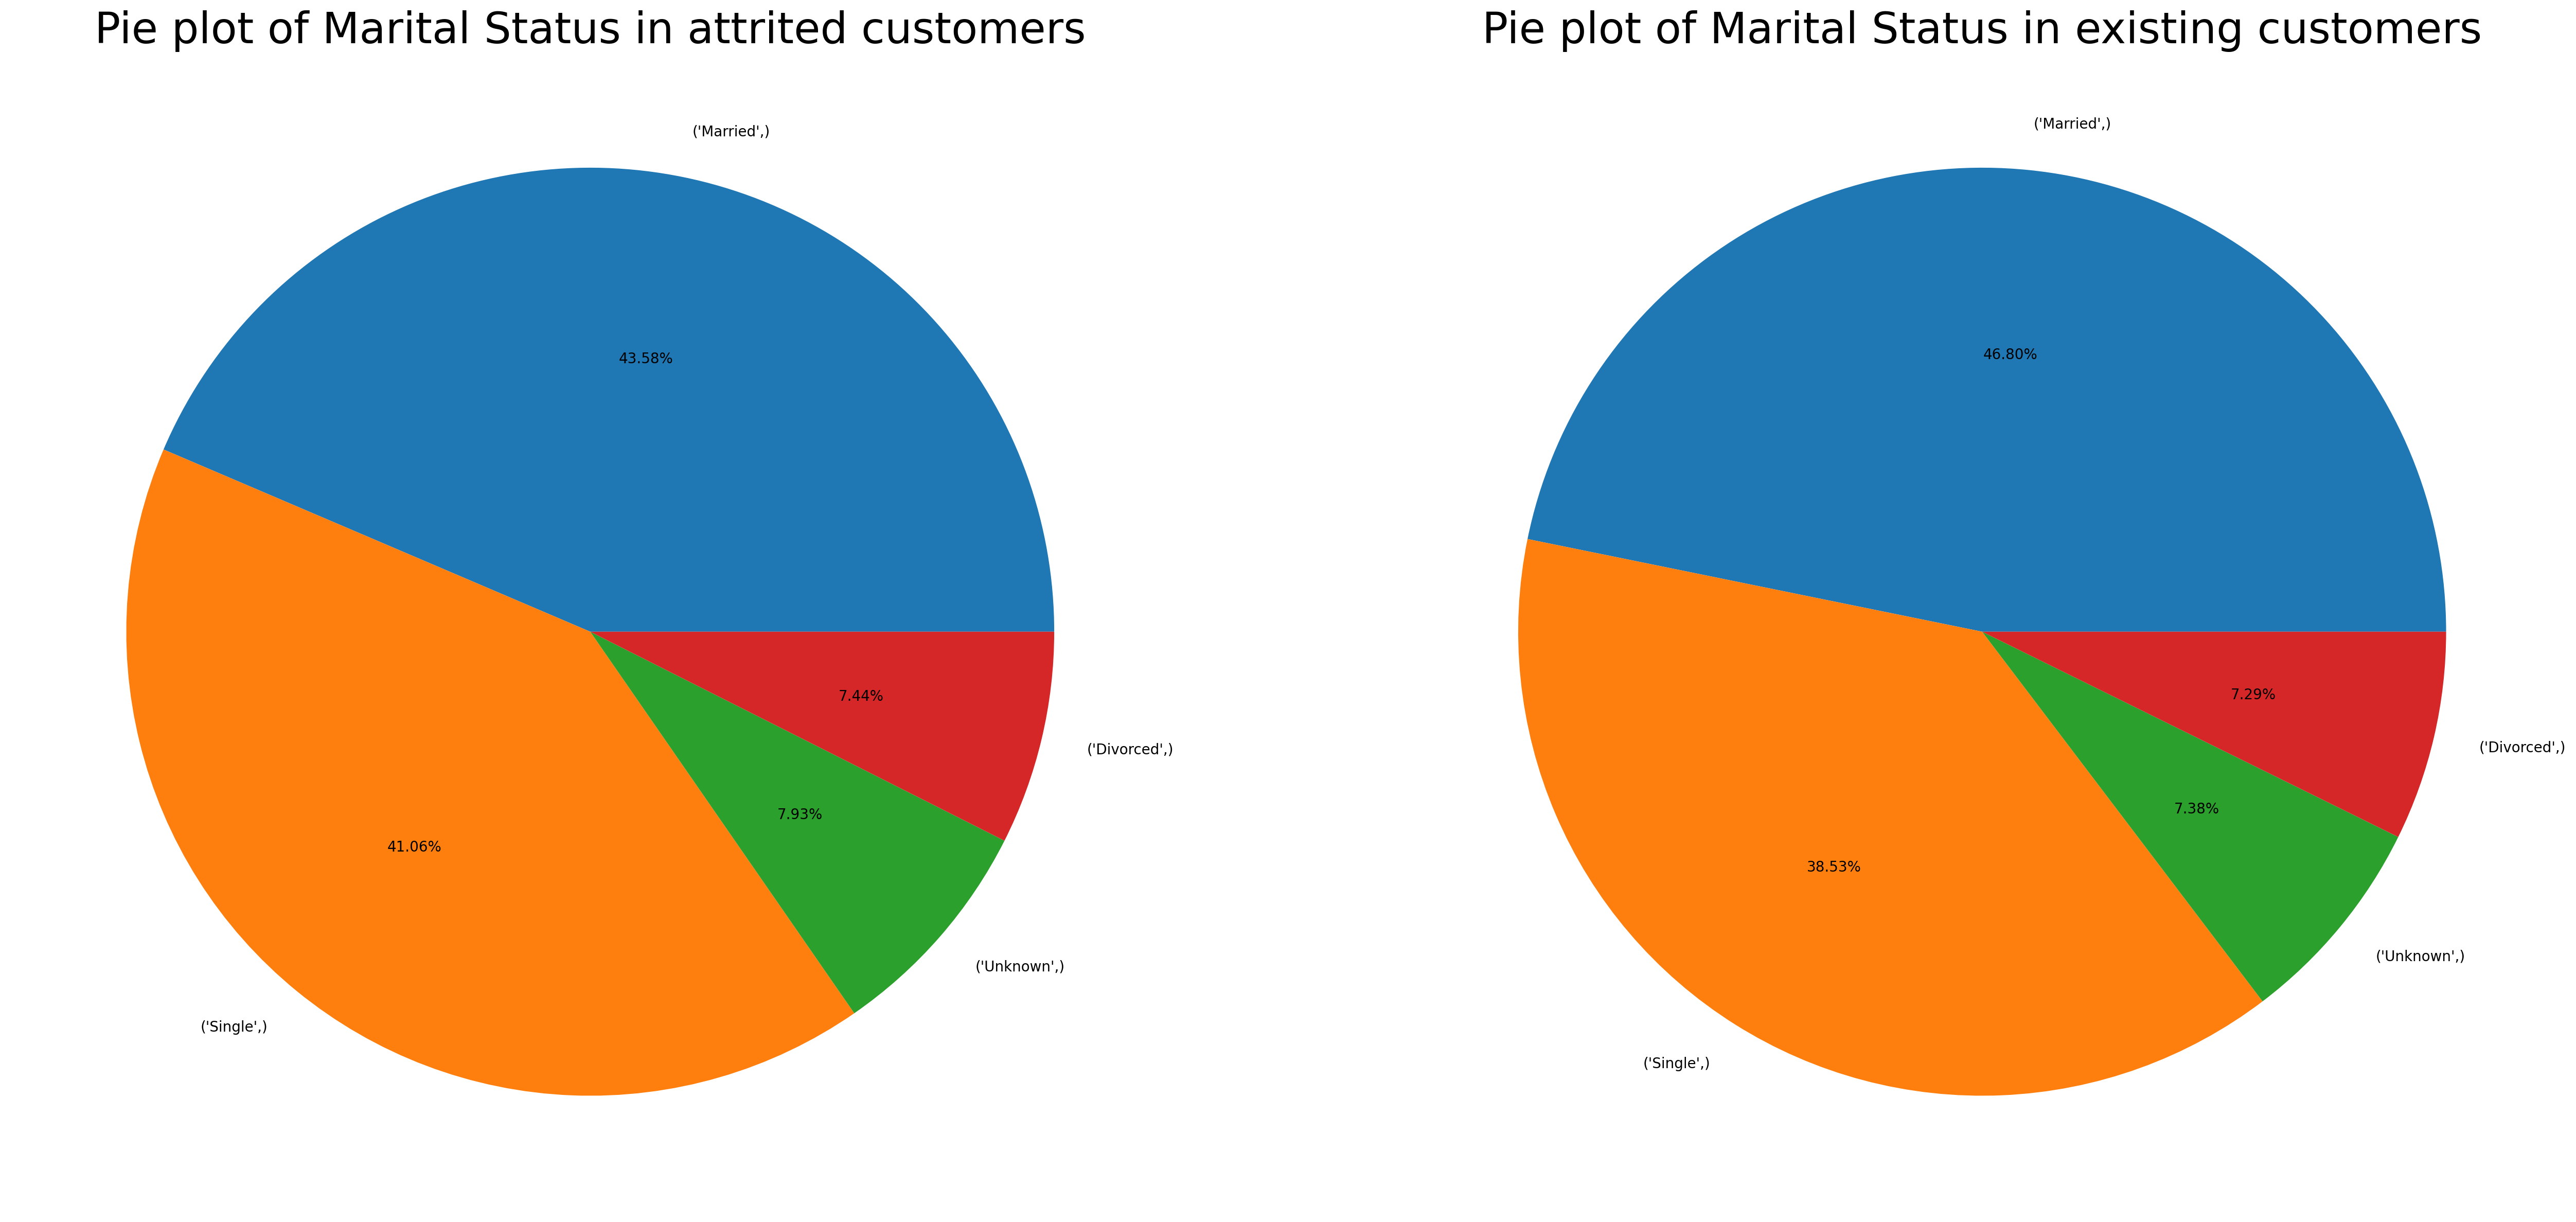

In [29]:
marital_count = df.loc[df["Attrition_Flag"] == "Attrited Customer", ["Marital_Status"]].value_counts()
marital_attrited = df.loc[df["Attrition_Flag"] == "Attrited Customer", ["Marital_Status"]].value_counts().tolist()
marital_existing = df.loc[df["Attrition_Flag"] == "Existing Customer", ["Marital_Status"]].value_counts().tolist()
fig, ax = plt.subplots(1, 2, dpi = 200, figsize = (32,18))
ax[0].set_title("Pie plot of Marital Status in attrited customers", fontsize = 30)
ax[0].pie(x = marital_attrited , autopct='%.2f%%', labels = marital_count.index)
ax[1].set_title("Pie plot of Marital Status in existing customers", fontsize = 30)
ax[1].pie(x = marital_existing, autopct='%.2f%%', labels = marital_count.index)
plt.show()

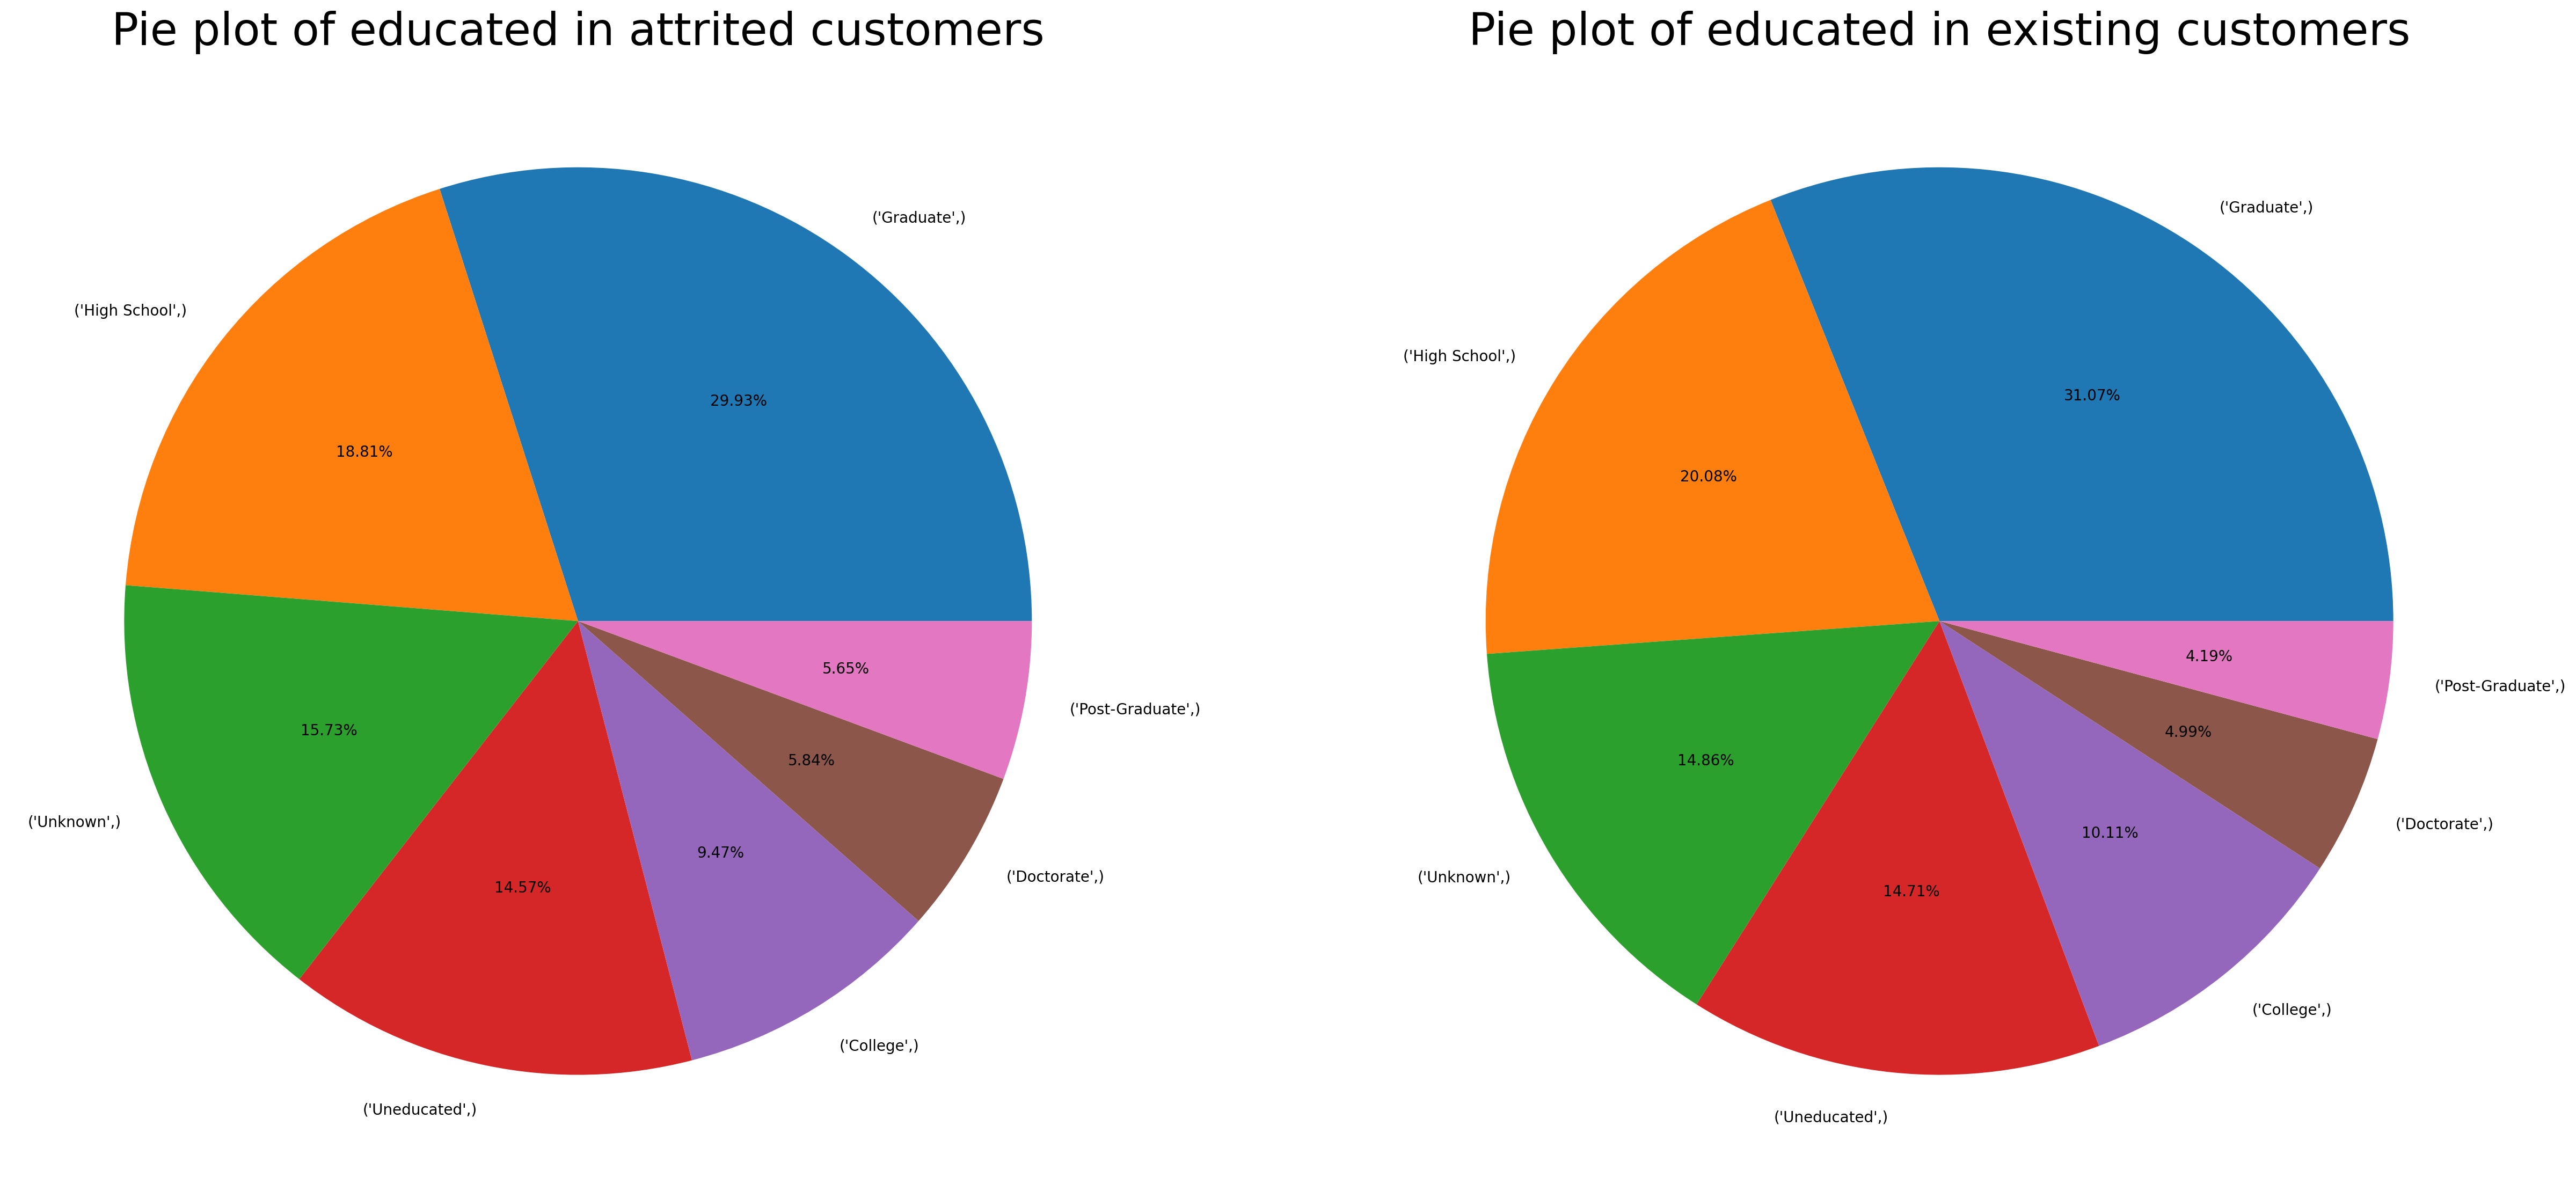

In [30]:
education_count = df.loc[df["Attrition_Flag"] == "Attrited Customer", ["Education_Level"]].value_counts()
educated_attrited = df.loc[df["Attrition_Flag"] == "Attrited Customer", ["Education_Level"]].value_counts().tolist()
educated_existing = df.loc[df["Attrition_Flag"] == "Existing Customer", ["Education_Level"]].value_counts().tolist()
fig, ax = plt.subplots(1, 2, dpi = 200, figsize = (30,15))
ax[0].set_title("Pie plot of educated in attrited customers", fontsize = 30)
ax[0].pie(x = educated_attrited , autopct='%.2f%%', labels = education_count.index)
ax[1].set_title("Pie plot of educated in existing customers", fontsize = 30)
ax[1].pie(x = educated_existing, autopct='%.2f%%', labels = education_count.index)
plt.show()

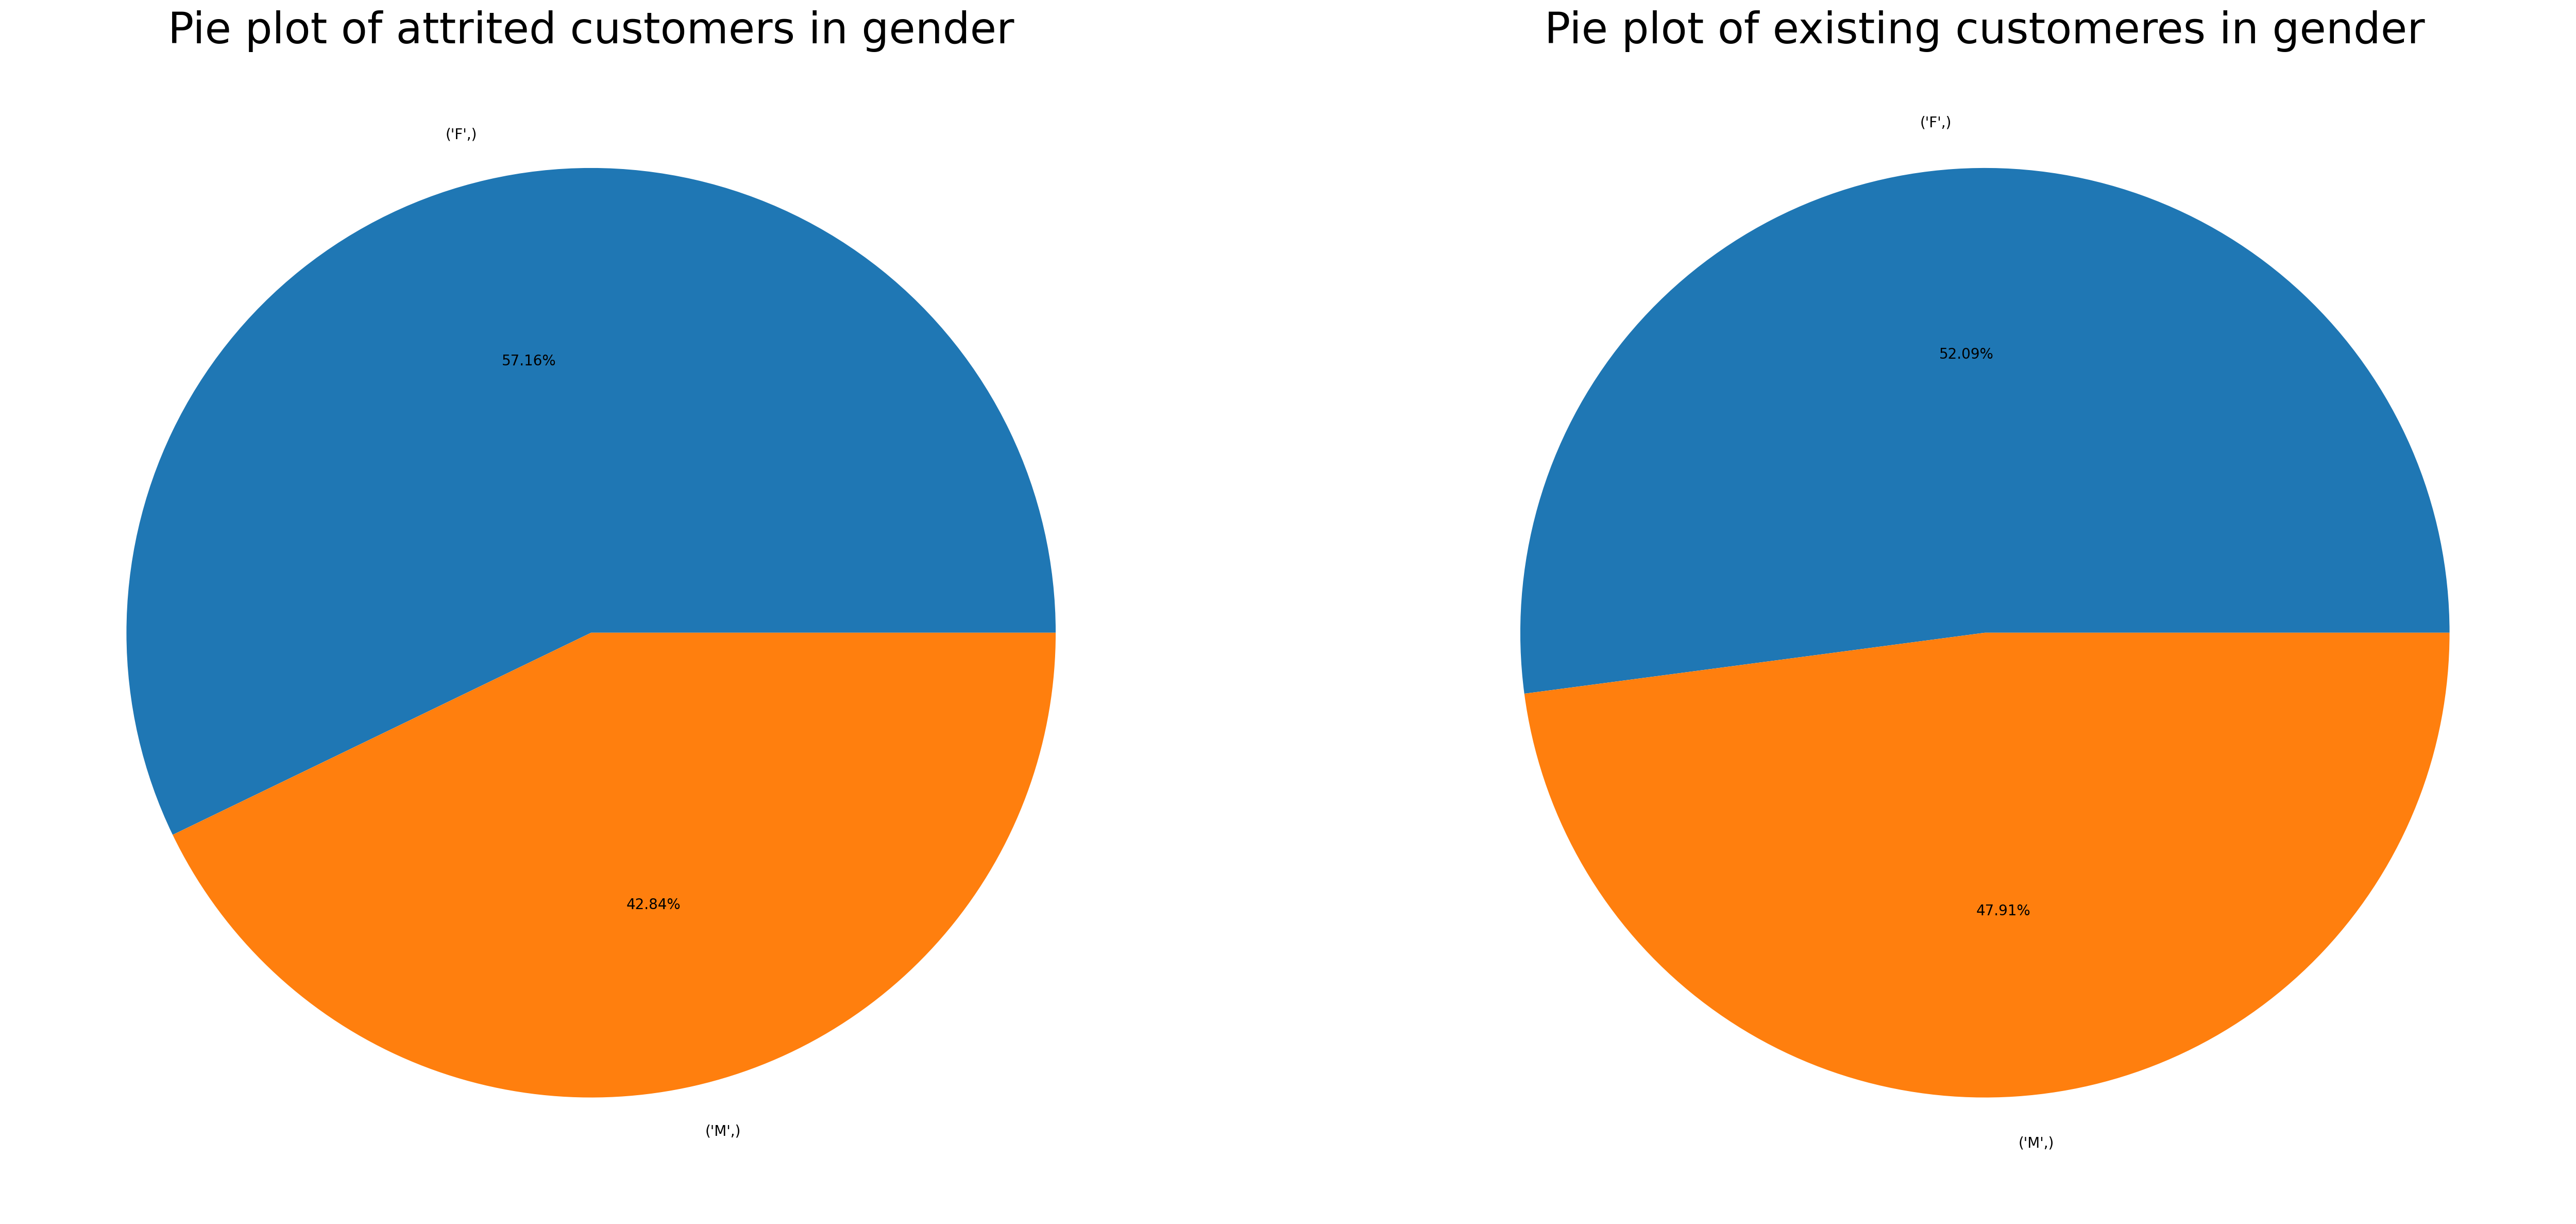

In [31]:
gender_count = df.loc[df["Attrition_Flag"] == "Attrited Customer", ["Gender"]].value_counts()
gender_attrited = df.loc[df["Attrition_Flag"] == "Attrited Customer", ["Gender"]].value_counts().tolist()
gender_existing = df.loc[df["Attrition_Flag"] == "Existing Customer", ["Gender"]].value_counts().tolist()
fig, ax = plt.subplots(1, 2, dpi = 200, figsize = (32,18))
ax[0].set_title("Pie plot of attrited customers in gender", fontsize = 30)
ax[0].pie(x = gender_attrited , autopct='%.2f%%', labels = gender_count.index)
ax[1].set_title("Pie plot of existing customeres in gender", fontsize = 30)
ax[1].pie(x = gender_existing , autopct='%.2f%%', labels = gender_count.index)
plt.show()

In [32]:
#assigning by 1 with attrited customer and 0 with existing customers anc converting as int datatype.
df.loc[df['Attrition_Flag'] == 'Attrited Customer', ['Attrition_Flag']] = 1
df.loc[df['Attrition_Flag']== 'Existing Customer', ['Attrition_Flag']] = 0
df['Attrition_Flag'] = df['Attrition_Flag'].astype(int)

In [33]:
#gender encoding
le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])
le_gender.classes_
#F = 0, M = 1

array(['F', 'M'], dtype=object)

In [34]:
edu_encoder = LabelEncoder()
df['Education_Level'] = edu_encoder.fit_transform(df['Education_Level'])
edu_encoder.classes_
#college/0, doctorate/1, graduate/2, highschool/3, postgraduate/4, uneducated/5, unknown/6

array(['College', 'Doctorate', 'Graduate', 'High School', 'Post-Graduate',
       'Uneducated', 'Unknown'], dtype=object)

In [36]:
#convert unknown = 6 to nan value
df.loc[df['Education_Level'] == 6, ['Education_Level']] = np.nan

In [37]:
df['Education_Level'].fillna(df['Education_Level'].mean(), inplace = True)

In [38]:
marital_encoder = LabelEncoder()
df['Marital_Status'] = marital_encoder.fit_transform(df['Marital_Status'])
marital_encoder.classes_
#divorced/0, married/1, single/2, unknown/3

array(['Divorced', 'Married', 'Single', 'Unknown'], dtype=object)

In [39]:
#convert unknown = 3 to nan
df.loc[df['Marital_Status']== 3, ['Marital_Status']] = np.nan
df['Marital_Status'].fillna(df['Marital_Status'].mean(),inplace = True)

In [40]:
income_encoder = LabelEncoder()
df['Income_Category'] =  income_encoder.fit_transform(df['Income_Category'])
income_encoder.classes_
# 0/unknown(i already changed 0 to unknown), 120+/1, 30-40/2, 40-60/3, 60-80/4, 80-120/5

array(['0', '120 +', '30- 40', '40 - 60', '60 - 80', '80 - 120'],
      dtype=object)

In [41]:
df.loc[df['Income_Category'] == 0, ['Income_Category']] = np.nan
df['Income_Category'].fillna(df['Income_Category'].median(), inplace = True)

In [42]:
card_encoder = LabelEncoder()
df['Card_Category'] = card_encoder.fit_transform(df['Card_Category'])
card_encoder.classes_
#Blue/0, gold/1. platinum/2, silver/3

array(['Blue', 'Gold', 'Platinum', 'Silver'], dtype=object)

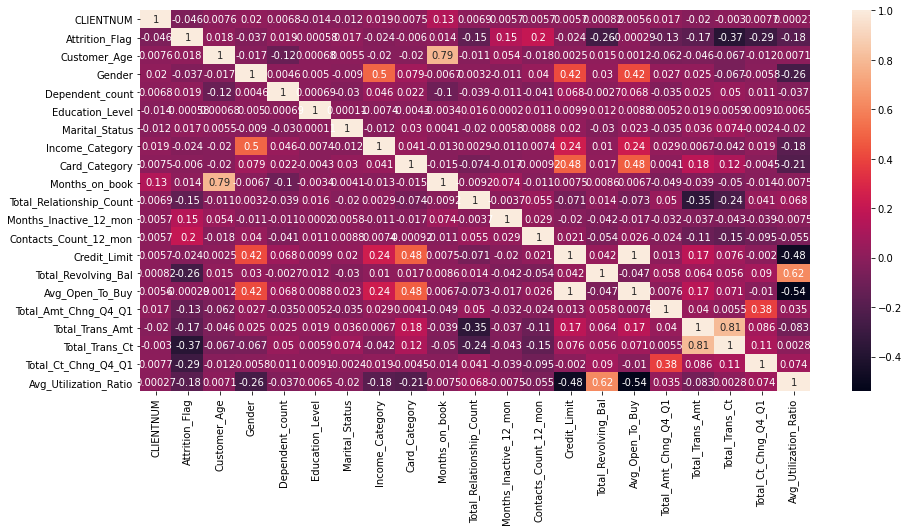

In [43]:
#correlation matrix help you to find out which variables are correlated most and less.
cor = df.corr()
plt.figure(figsize=(15,7))
sns.heatmap(cor, annot = True)

We can see gender, income category, customer age, total_trans_Amt, and total_trans_ct, age_utilization_ratio are positively correlated with target variable.

In [44]:
#Splitting the model in train and test
from sklearn.model_selection import train_test_split
x = df.loc[:, df.columns !='Attrition_Flag']
y = df.loc[:, df.columns =='Attrition_Flag']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 50, test_size = 0.3, shuffle = True)


In [45]:
x_train.shape

(7088, 20)

In [46]:
y_train.shape

(7088, 1)

In [47]:
#building logistic regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train.values.ravel()) #.values will give the values in an array. (shape: (n,1),.ravel will convert that array shape to (n, )
yr_pred = lr.predict(x_test)
lr_score = accuracy_score(y_test, yr_pred)
confumat_lr = pd.DataFrame(confusion_matrix(y_test, yr_pred))
print(confumat_lr)
lr_score

      0  1
0  2517  0
1   522  0


0.8282329713721619

Actual predication of existing  custmors are  2517 false predication of existing customers are 522

In [48]:
dt = DecisionTreeClassifier(criterion = 'entropy', splitter = 'random')
dt.fit(x_train, y_train)
yt_pred = dt.predict(x_test)
dt_score = accuracy_score(y_test, yt_pred)
confumat_dt = pd.DataFrame(confusion_matrix(y_test, yt_pred))
print(confumat_dt)
dt_score

      0    1
0  2415  102
1   117  405


0.9279368213228035

In [49]:
from sklearn.model_selection import cross_validate
cross_val = cross_validate(DecisionTreeClassifier(), x, y)
cross_val

{'fit_time': array([0.0942049 , 0.08994269, 0.10082126, 0.10921526, 0.06991148]),
 'score_time': array([0.00209641, 0.00201559, 0.00277352, 0.00203514, 0.00180936]),
 'test_score': array([0.79960513, 0.8869694 , 0.94419753, 0.95160494, 0.85333333])}

In [50]:
from sklearn.model_selection import cross_val_score
cross_score = cross_val_score(DecisionTreeClassifier(), x, y, cv = 5)
cross_score

array([0.80207305, 0.89091807, 0.94864198, 0.95407407, 0.85333333])

In [51]:
from sklearn.svm import SVC
svc = SVC(kernel = 'sigmoid')
svc.fit(x_train, y_train)
ysv_pred = svc.predict(x_test)
sv_score = accuracy_score(y_test, ysv_pred)
confumat_sv = pd.DataFrame(confusion_matrix(y_test, ysv_pred))
print(confumat_sv)
sv_score

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


      0    1
0  2343  174
1   485   37


0.7831523527476143

In [52]:
cross_score = cross_val_score(SVC(), x, y, cv = 5)
cross_score

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

array([0.83909181, 0.83909181, 0.83950617, 0.83950617, 0.83950617])

In [53]:
cross_svc = cross_validate(SVC(), x, y)
cross_val

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

{'fit_time': array([0.0942049 , 0.08994269, 0.10082126, 0.10921526, 0.06991148]),
 'score_time': array([0.00209641, 0.00201559, 0.00277352, 0.00203514, 0.00180936]),
 'test_score': array([0.79960513, 0.8869694 , 0.94419753, 0.95160494, 0.85333333])}

DecisionTreeClassifier is perfectly fit for our dataset and we got accuracy score of 90% to predict our model.

In [54]:
!git clone https://github.com/Sinha123456/projects_jupyter.git

Cloning into 'projects_jupyter'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 35 (delta 12), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (35/35), done.
